# Data Discription
The United States Census defines senior citizens as people 65 and older, as referenced by https://www.census.gov/library/visualizations/time-series/demo/nia_county_maps.html. Our hypothesis is that senior citizens have a higher chance of dying from the COVID-19 virus due to weaker immune systems. To test this hypothesis, we used data from the CDC's Provisional COVID-19 Death Counts dataset at: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku/data. 

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading in Data
deaths_from_covid=pd.read_csv("data_resources/covid_death.csv")
deaths_from_covid.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,8/5/2020,2/1/2020,8/1/2020,United States,All,Under 1 year,15.0,8832.0,82.0,2.0,14.0,109.0,NaN
1,8/5/2020,2/1/2020,8/1/2020,United States,All,1-4 years,10.0,1690.0,55.0,2.0,41.0,104.0,NaN
2,8/5/2020,2/1/2020,8/1/2020,United States,All,5-14 years,20.0,2611.0,86.0,6.0,50.0,150.0,NaN
3,8/5/2020,2/1/2020,8/1/2020,United States,All,15-24 years,225.0,16353.0,326.0,77.0,52.0,522.0,NaN
4,8/5/2020,2/1/2020,8/1/2020,United States,All,25-34 years,1074.0,33993.0,1250.0,477.0,150.0,1983.0,NaN


# Cleaning
First we found the unique values in of age groups. Next, we found the values from the COVID-19 Deaths and set it equal to the number of covid deaths. We isolated the data from the age groups and COVID-19 deaths to plot our bar graph. Finally, we found the percentage of Age groups that died from COVID-19

In [2]:
# Find the unique values in the Age group column
age_range=deaths_from_covid["Age group"]
age_range.drop_duplicates()
# Found the values from the COVID-19 Deaths column and set it equal to the number_of_COVID_deaths variable
number_of_COVID_deaths=deaths_from_covid["COVID-19 Deaths"]
number_of_COVID_deaths
# Isolate the data from Age group and COVID-19 Deaths columns for the bar plot
bar_data=deaths_from_covid.groupby(["Age group"]).count()["COVID-19 Deaths"]
bar_data

Age group
1-4 years            100
15-24 years           51
25-34 years           45
35-44 years           65
45-54 years           82
5-14 years            95
55-64 years           94
65-74 years           98
75-84 years           99
85 years and over    102
All Ages              55
All ages             155
Under 1 year          95
Name: COVID-19 Deaths, dtype: int64

In [3]:
# grouping by age and covid-19 deaths
groupby_age=deaths_from_covid.groupby(["Age group", "COVID-19 Deaths"])
# Creating a DataFrame that is groupped by age
groupby_age_df=pd.DataFrame(groupby_age.size())
# Counting the ages within the data frame
age=pd.DataFrame(groupby_age_df.groupby(["Age group"]).count())
# Creating a column "Total Deaths"
age.columns=["Total Deaths"]
# Calculating the percentage of total deaths per age range
age["Percentage of Ages"] = (100*(age["Total Deaths"]/age["Total Deaths"].sum()))
# Appending the calculation to column
age["Percentage of Ages"] = age["Percentage of Ages"]
age

,Total Deaths,Percentage of Ages
Age group,,
1-4 years,3,0.471698
15-24 years,8,1.257862
25-34 years,25,3.930818
35-44 years,41,6.446541
45-54 years,60,9.433962
5-14 years,4,0.628931
55-64 years,74,11.635220
65-74 years,87,13.679245
75-84 years,86,13.522013


In [4]:
# Creating DataFrame and Exporting
age_of_covid_death_df = pd.DataFrame({"Age Range": age_range,
                                     "Covid Deaths": number_of_COVID_deaths,
                                     "Data Colection": bar_data})
# Exporting DataFrame
age_of_covid_death_df.to_csv(r'..\data_resources\age_percentage_of_covid-19_deaths.csv', index = False)
# Showing DataFrame
age_of_covid_death_df.head()

,Age Range,Covid Deaths,Data Colection
0,Under 1 year,15.0,NaN
1,1-4 years,10.0,NaN
2,5-14 years,20.0,NaN
3,15-24 years,225.0,NaN
4,25-34 years,1074.0,NaN


# Visualization
We created a bar & pie chart for Age group vs COVID-19 Deaths using pandas
Create a pie chart using Pandas

NameError: name 'ax' is not defined

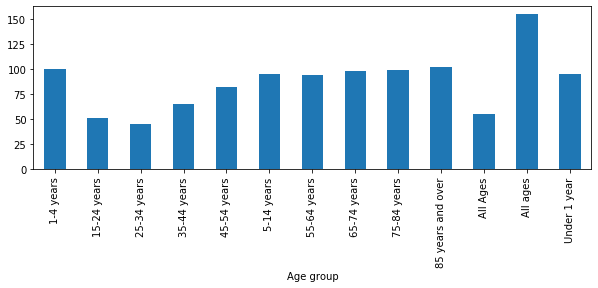

In [5]:
# Plotting Bargraph
bar_data.plot(kind="bar",figsize=(10,3))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title("Ages of Death vs COVID-19 Deaths")
plt.ylabel("Number of COVID-19 Deaths")
plt.xlabel("Ages of Death")
plt.show()
plt.tight_layout()

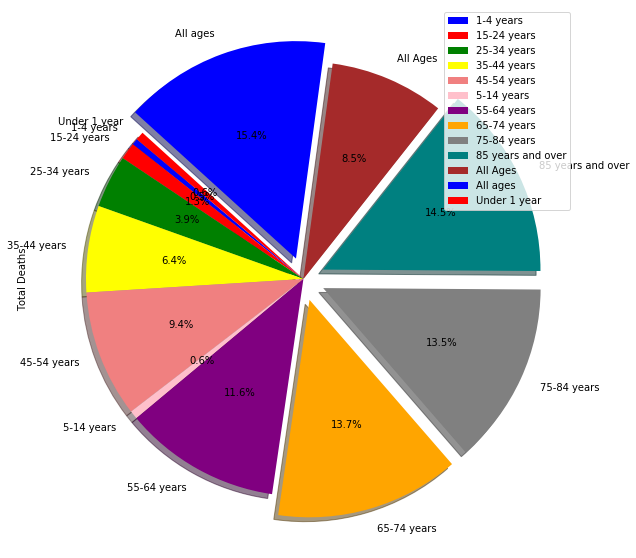

In [6]:
# Plotting PieChart
colors = ['blue', 'red', 'green', 'yellow', 'lightcoral', 'pink', 'purple', 'orange', 'gray', 'teal', 'brown']
explode = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0.1, 0]
plot = age.plot.pie(y='Total Deaths',figsize=(10,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

# Analysis
As of August 5, 2020, people who are 85 years and older have the highest percentage of dying from COVID-19, followed by people between the ages of 65 to 74 years. While these results lined up with our hypothesis that senior citizens are at a higher risk of dying from COVID-19, other factors to consider include income and access to medical services.  